In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from matplotlib import cbook as cbook
from matplotlib.pyplot import figure

pd.options.mode.chained_assignment = None

In [7]:
#LOAD DATA and CONVERT to DataFrame

coronaTable = pd.read_csv('all-states-history.csv')
coronaFrame = pd.DataFrame(coronaTable)

In [24]:
#Create State-Level DATA FRAMES

massFilter = (coronaFrame['state'] == 'MA')
ctFilter = (coronaFrame['state'] == 'CT')
riFilter = (coronaFrame['state'] == 'RI')
nhFilter= (coronaFrame['state'] == 'NH')
meFilter = (coronaFrame['state'] == 'ME')
vtFilter = (coronaFrame['state'] == 'VT')

massFrame = coronaFrame[massFilter]
ctFrame = coronaFrame[ctFilter]
riFrame = coronaFrame[riFilter]
nhFrame = coronaFrame[nhFilter]
meFrame = coronaFrame[meFilter]
vtFrame = coronaFrame[vtFilter]

In [22]:
#DATA FILTERS

#Massachusetts

casesFilterMA = (massFrame['positiveIncrease'] > 0) & (massFrame['positiveIncrease'] < 3800)
massFrame = massFrame[casesFilterMA]
massFrame = massFrame.sort_values('date')

#Connecticut

ctFrame = ctFrame.sort_values('date')

#Rhode Island

riFrame = riFrame.sort_values('date')

#New Hampshire

nhFrame = nhFrame.sort_values('date')

#Maine

meFrame = meFrame.sort_values('date')

#Vermont

vtFrame = vtFrame.sort_values('date')

In [26]:
#CREATE THE VARIABLES

#Massachusetts

dateMA = massFrame['date']
newCasesMA = massFrame['positiveIncrease']
newIndividualsTestedMA = massFrame['totalTestsPeopleViralIncrease']
currentHospitalizationsMA = massFrame['hospitalizedCurrently']
dailyNewDeathsMA = massFrame['deathIncrease']

massFrame['pctIndividualsPositive'] = newCasesMA / newIndividualsTestedMA
pctIndividualsPositiveMA = massFrame['pctIndividualsPositive'] * 100

massFrame['longMovingAvg'] = massFrame.positiveIncrease.rolling(7, min_periods=7).mean()
massFrame['hospitalizedMovingAvg'] = massFrame.hospitalizedCurrently.rolling(7, min_periods=7).mean()
massFrame['dailyDeathsMovingAvg'] = massFrame.deathIncrease.rolling(14, min_periods=14).mean()

longMovingAvgMA = massFrame['longMovingAvg']
hospitalizedMovingAvgMA = massFrame['hospitalizedMovingAvg']
dailyDeathMovingAvgMA = massFrame['dailyDeathsMovingAvg']

#Connecticut

dateCT = ctFrame['date']
newCasesCT = ctFrame['positiveIncrease']
newIndividualsTestedCT = ctFrame['totalTestsPeopleViralIncrease']
currentHospitalizationsCT = ctFrame['hospitalizedCurrently']
dailyNewDeathsCT = ctFrame['deathIncrease']

ctFrame['pctIndividualsPositive'] = newCasesCT / newIndividualsTestedCT
pctIndividualsPositiveCT = ctFrame['pctIndividualsPositive'] * 100

ctFrame['longMovingAvg'] = ctFrame.positiveIncrease.rolling(7, min_periods=7).mean()
ctFrame['hospitalizedMovingAvg'] = ctFrame.hospitalizedCurrently.rolling(7, min_periods=7).mean()
ctFrame['dailyDeathsMovingAvg'] = ctFrame.deathIncrease.rolling(14, min_periods=14).mean()

longMovingAvgCT  = ctFrame['longMovingAvg']
hospitalizedMovingAvgCT = ctFrame['hospitalizedMovingAvg']
dailyDeathMovingAvgCT = ctFrame['dailyDeathsMovingAvg']

#Rhode Island

dateRI = riFrame['date']
newCasesRI = riFrame['positiveIncrease']
newIndividualsTestedRI = riFrame['totalTestsPeopleViralIncrease']
currentHospitalizationsRI = riFrame['hospitalizedCurrently']
dailyNewDeathsRI = riFrame['deathIncrease']

riFrame['pctIndividualsPositive'] = newCasesRI / newIndividualsTestedRI
pctIndividualsPositiveRI = newCasesRI / newIndividualsTestedRI

riFrame['longMovingAvg'] = riFrame.positiveIncrease.rolling(7, min_periods=7).mean()
riFrame['hospitalizedMovingAvg'] = riFrame.hospitalizedCurrently.rolling(7, min_periods=7).mean()
riFrame['dailyDeathsMovingAvg'] = riFrame.deathIncrease.rolling(14, min_periods=14).mean()

longMovingAvgRI  = riFrame['longMovingAvg']
hospitalizedMovingAvgRI = riFrame['hospitalizedMovingAvg']
dailyDeathMovingAvgRI = riFrame['dailyDeathsMovingAvg']

#New Hampshire



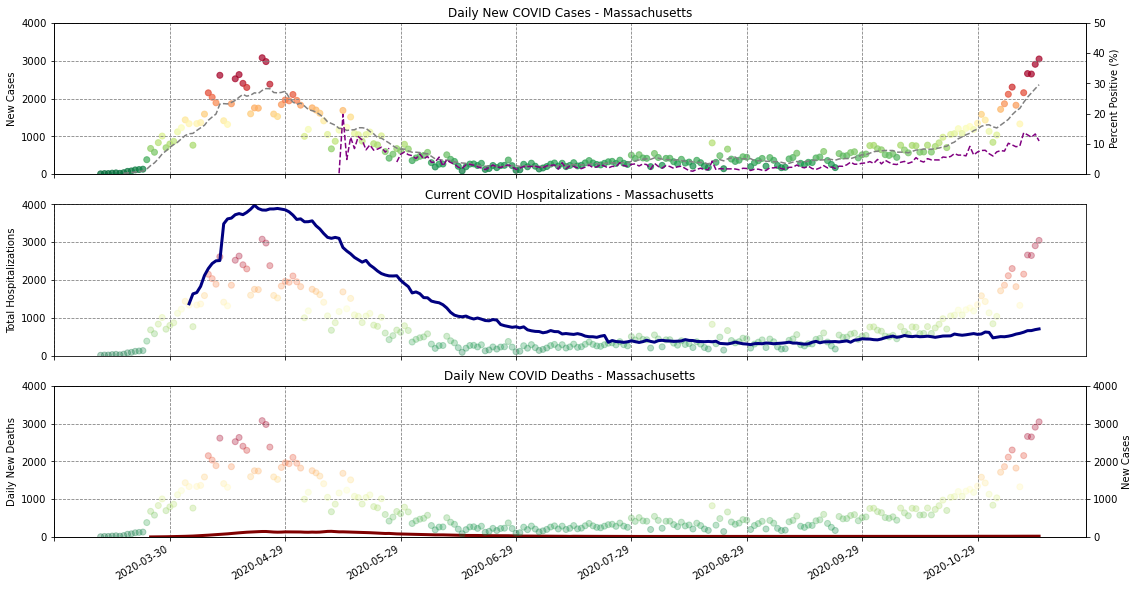

In [12]:
#GENERATE THE DASHBOARD -- MASSACHUSETTS

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)

ax4 = ax1.twinx()
ax5 = ax3.twinx()

cmap=mpl.cm.RdYlGn_r
norm=mpl.colors.Normalize(vmin=0, vmax=2500)

ax1.scatter(dateMA, newCasesMA, c=newCasesMA, cmap=cmap, norm=norm, alpha=0.7, label='Daily New Cases')
ax1.plot(dateMA, longMovingAvgMA, linestyle='--', c='grey', label='7-Day Moving Average')
ax4.plot(dateMA, pctIndividualsPositiveMA, linestyle="--", c='purple')
ax1.set_ylim(0,4000)
ax2.set_ylim(0,4000)
ax3.set_ylim(0,4000)
ax4.set_ylim(0,50)
ax5.set_ylim(0,4000)


ax2.plot(dateMA, currentHospitalizationsMA, linewidth=3, color='navy', label="Currently Hospitalized Patients with COVID-19")
ax2.scatter(dateMA, newCasesMA, c=newCasesMA, cmap=cmap, norm=norm, alpha=0.3)

ax3.plot(dateMA, dailyDeathMovingAvgMA, linewidth=3, color='maroon', label="Daily COVID-19 Deaths")
ax5.scatter(dateMA, newCasesMA, c=newCasesMA, cmap=cmap, norm=norm, alpha=0.3)

ax1.grid(True, linestyle='--', color='grey')
ax2.grid(True, linestyle='--', color='grey')
ax3.grid(True, linestyle='--', color='grey')

ax1.set_title("Daily New COVID Cases - Massachusetts")
ax2.set_title("Current COVID Hospitalizations - Massachusetts")
ax3.set_title("Daily New COVID Deaths - Massachusetts")

ax1.set_ylabel("New Cases")
ax4.set_ylabel("Percent Positive (%)")
ax2.set_ylabel("Total Hospitalizations")
ax3.set_ylabel("Daily New Deaths")
ax5.set_ylabel("New Cases")

plt.gca().xaxis.set_major_locator(mpl_dates.DayLocator(interval=30))
fig.autofmt_xdate()

fig.set_size_inches(18.5, 10.5)

In [ ]:
#GENERATE THE DASHBOARD - CONNECTICUT